1. INTRODUCCION


Coca-Cola Femsa is the largest franchise bottler of Coca-Cola products worldwide, operating across several countries in Latin America and the Philippines. The company focuses on the production, distribution, and marketing of non-alcoholic beverages, serving millions of consumers daily.

Linear regression analysis is a valuable tool in business intelligence, allowing companies to uncover and quantify relationships between variables. By carefully selecting specific factors, such as marketing investments, demographic trends, and seasonal effects, businesses can predict how these variables influence key outcomes like sales. This analysis enhances forecasting accuracy and supports strategic decision-making, optimizing overall business performance.

The challenge lies in accurately forecasting the demand for Coca-Cola products in the Guadalajara Metropolitan Area to ensure adequate supply levels. This can be addressed by building a predictive model that uses historical data and relevant forecasting methods. The model will support strategic decision-making, enabling Coca-Cola Femsa to align production with anticipated demand, optimizing their supply chain, and effectively meeting consumer needs.


2. Exploratory Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [3]:
from google.colab import files
uploaded = files.upload()

Saving cocacolasales.xlsx to cocacolasales.xlsx


In [4]:
df = pd.read_excel('cocacolasales.xlsx')
df.head()

,tperiod,sales_unitboxes,consumer_sentiment,CPI,inflation_rate,unemp_rate,gdp_percapita,itaee,itaee_growth,pop_density,job_density,pop_minwage,exchange_rate,max_temperature,holiday_month
0,2021-01-15,5516689.143,38.062504,87.110103,-0.09,0.052303,11659.55571,103.765354,0.049717,98.541847,18.260479,9.657861,14.692586,28,0
1,2021-02-15,5387496.113,37.491143,87.275377,0.19,0.053113,11659.55423,103.765354,0.049717,98.541860,18.463294,9.657861,14.921342,31,0
2,2021-03-15,5886746.634,38.505219,87.630717,0.41,0.046088,11659.55275,103.765354,0.049717,98.541872,18.641639,9.657861,15.228338,29,0
3,2021-04-15,6389182.011,37.842864,87.403840,-0.26,0.051020,11625.74515,107.751835,0.031839,98.828431,18.678763,9.594919,15.226180,32,1
4,2021-05-15,6448274.629,38.031692,86.967366,-0.50,0.055174,11625.74368,107.751835,0.031839,98.828444,18.675393,9.594919,15.264470,34,0


In [ ]:
#Missing Values

In [ ]:
df.isnull()
df.isnull().sum()

,0
tperiod,0
sales_unitboxes,0
consumer_sentiment,0
CPI,0
inflation_rate,0
unemp_rate,0
gdp_percapita,0
itaee,0
itaee_growth,0
pop_density,0


In [ ]:
#Table Structure

In [ ]:
structure = df.info()
structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tperiod             48 non-null     datetime64[ns]
 1   sales_unitboxes     48 non-null     float64       
 2   consumer_sentiment  48 non-null     float64       
 3   CPI                 48 non-null     float64       
 4   inflation_rate      48 non-null     float64       
 5   unemp_rate          48 non-null     float64       
 6   gdp_percapita       48 non-null     float64       
 7   itaee               48 non-null     float64       
 8   itaee_growth        48 non-null     float64       
 9   pop_density         48 non-null     float64       
 10  job_density         48 non-null     float64       
 11  pop_minwage         48 non-null     float64       
 12  exchange_rate       48 non-null     float64       
 13  max_temperature     48 non-null     int64         
 

In [ ]:
#Descriptive Statistics

In [ ]:
descriptive_stats = df.describe().T
descriptive_stats

,count,mean,min,25%,50%,75%,max,std
tperiod,48,2021-07-02 00:00:00,2021-01-15 00:00:00,2021-04-08 00:00:00,2021-07-01 12:00:00,2021-09-24 18:00:00,2021-12-18 00:00:00,NaN
sales_unitboxes,48.0,6473690.646562,5301754.832,6171766.505,6461357.144,6819781.79475,7963062.561,598730.045903
consumer_sentiment,48.0,37.15185,28.667872,35.644474,36.760016,38.144293,44.865439,2.889173
CPI,48.0,93.402719,86.967366,89.180915,92.821459,98.403412,103.02,5.058049
inflation_rate,48.0,0.348542,-0.5,0.165,0.385,0.5575,1.7,0.389604
unemp_rate,48.0,0.044419,0.034662,0.040104,0.043687,0.048974,0.055174,0.005881
gdp_percapita,48.0,11978.8963,11558.58701,11830.071728,12013.560335,12161.642717,12329.0465,251.302961
itaee,48.0,113.852442,103.765354,111.483897,113.469365,117.127478,122.482102,4.753228
itaee_growth,48.0,0.031736,0.005571,0.022376,0.029977,0.043038,0.056536,0.014621
pop_density,48.0,100.647189,98.541847,99.614891,100.66591,101.692455,102.694498,1.289906


In [ ]:
#Data Visualization

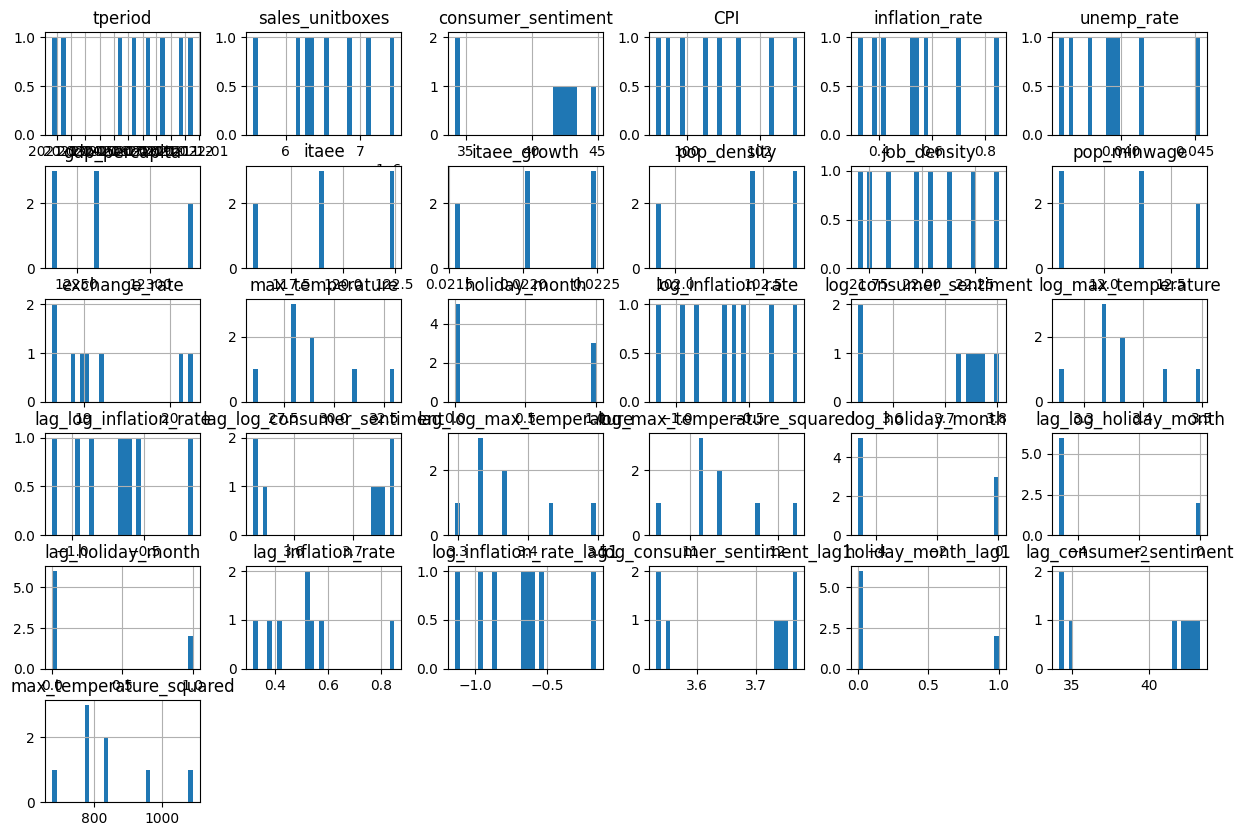

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

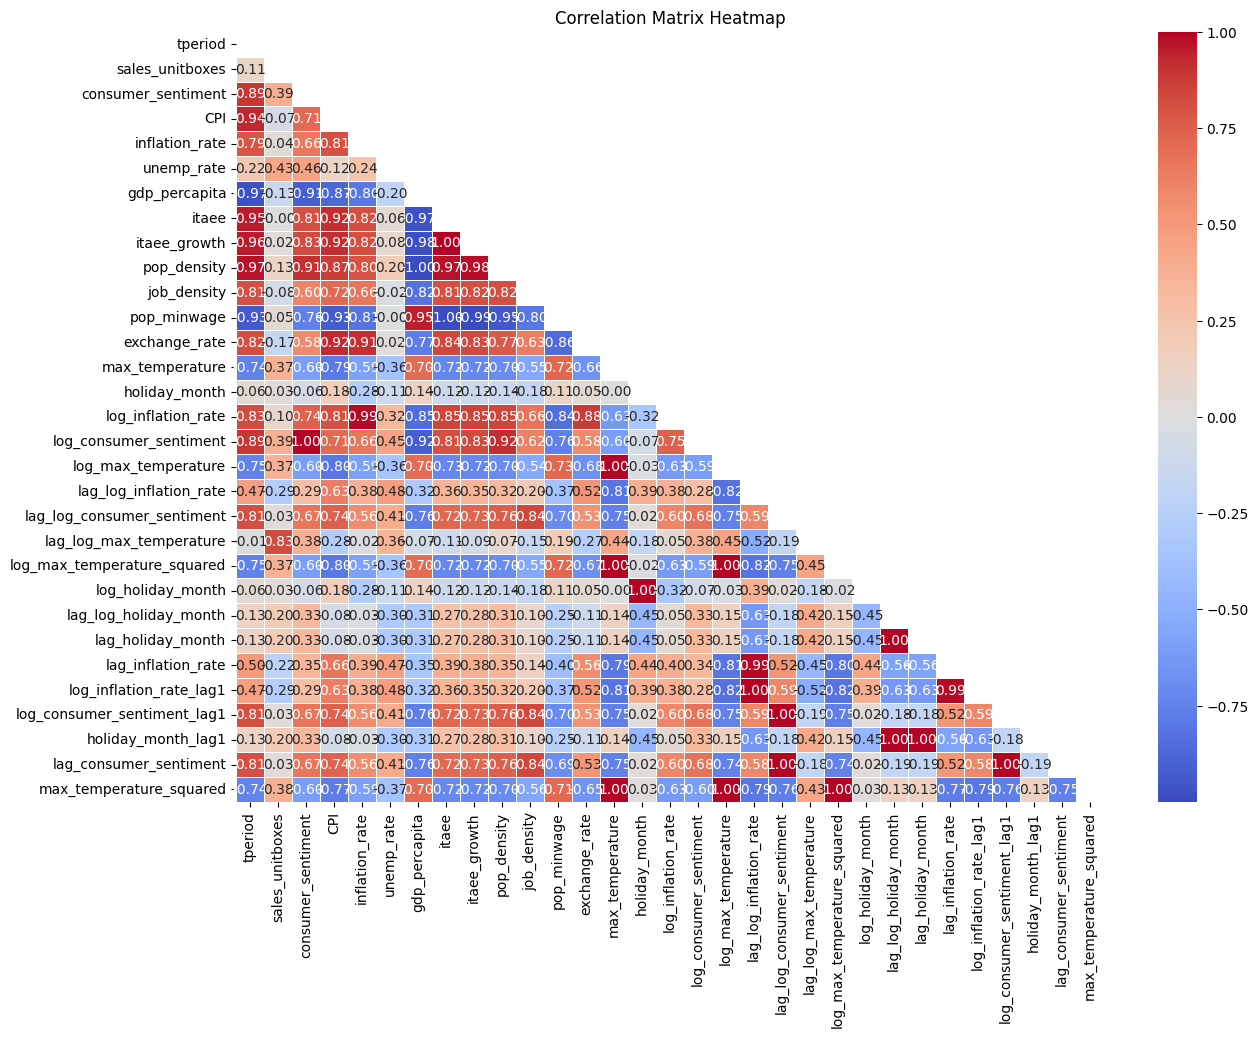

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a mask to hide the upper triangle and diagonal (1 values)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plotting the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix Heatmap')
plt.show()

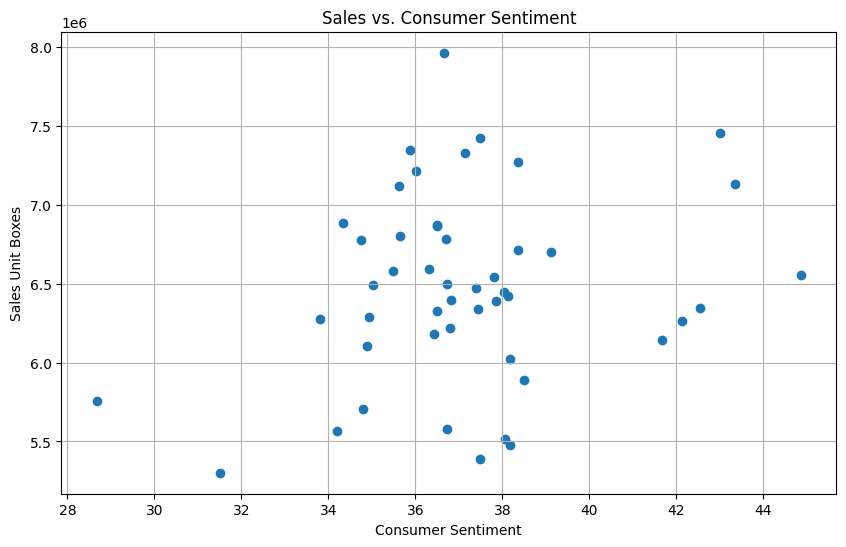

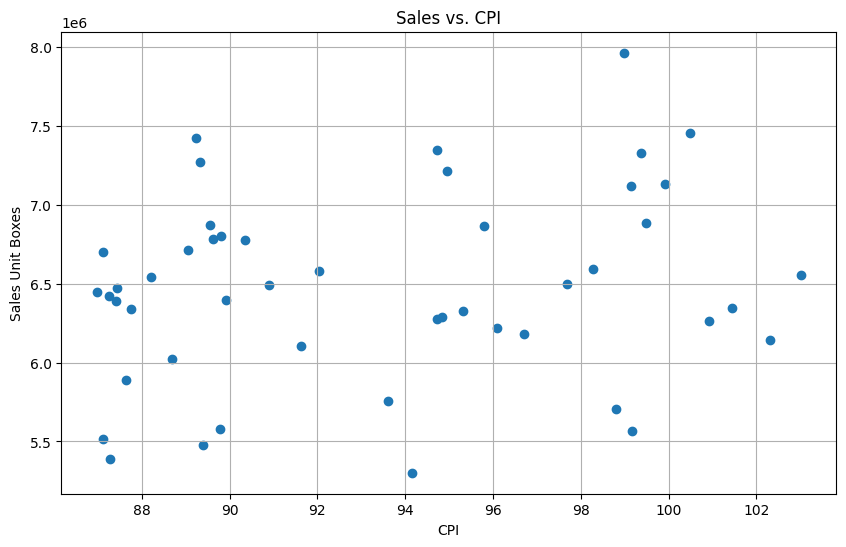

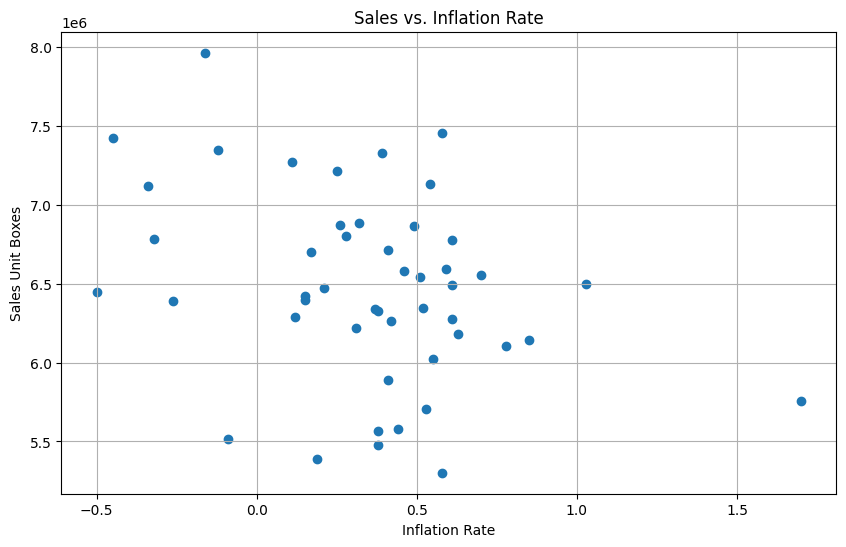

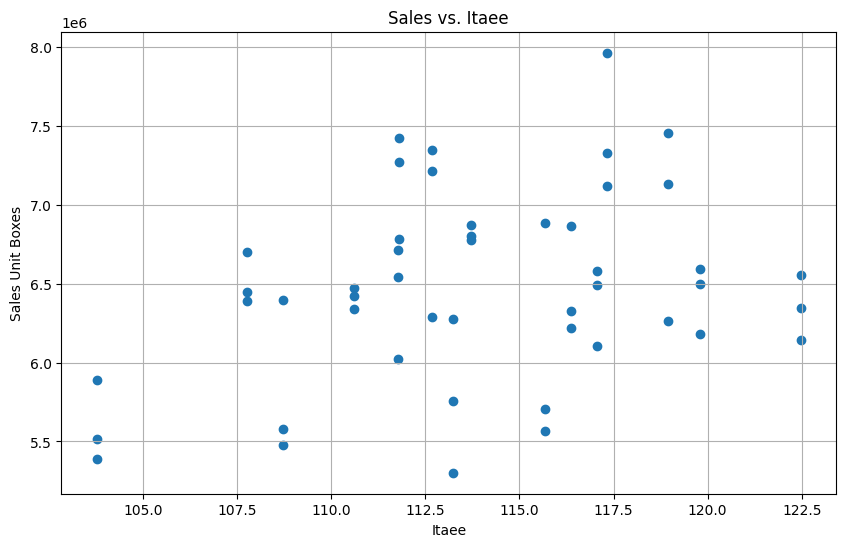

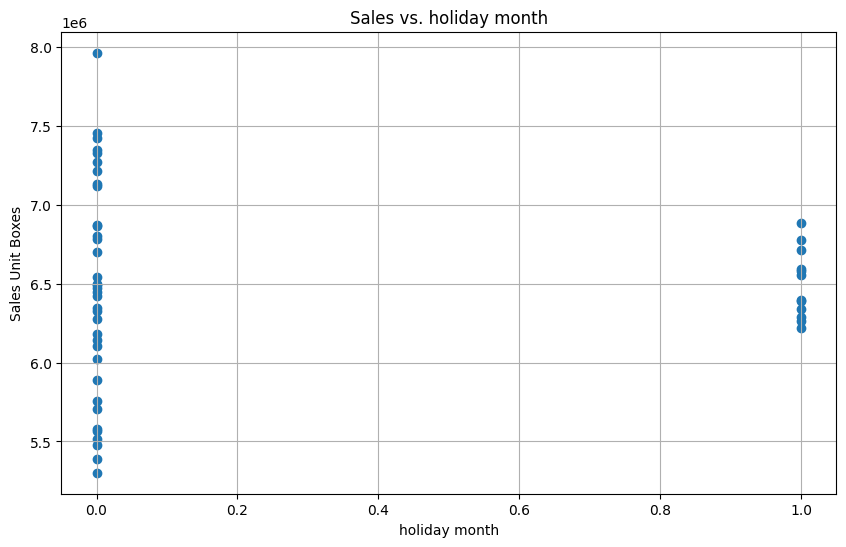

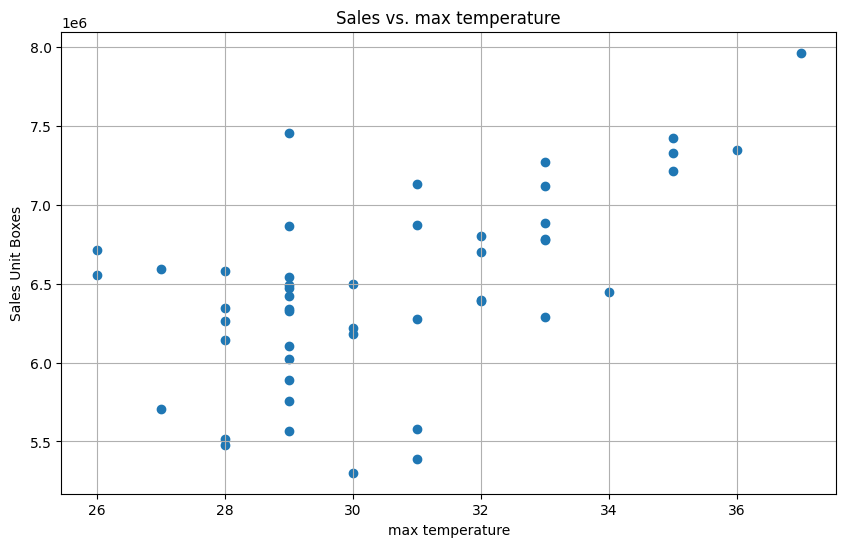

In [ ]:
# Scatter plot for Sales vs. Consumer Sentiment
plt.figure(figsize=(10, 6))
plt.scatter(df['consumer_sentiment'], df['sales_unitboxes'])
plt.title('Sales vs. Consumer Sentiment')
plt.xlabel('Consumer Sentiment')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. CPI
plt.figure(figsize=(10, 6))
plt.scatter(df['CPI'], df['sales_unitboxes'])
plt.title('Sales vs. CPI')
plt.xlabel('CPI')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Inflation Rate
plt.figure(figsize=(10, 6))
plt.scatter(df['inflation_rate'], df['sales_unitboxes'])
plt.title('Sales vs. Inflation Rate')
plt.xlabel('Inflation Rate')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Itaee
plt.figure(figsize=(10, 6))
plt.scatter(df['itaee'], df['sales_unitboxes'])
plt.title('Sales vs. Itaee')
plt.xlabel('Itaee')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Holiday Month
plt.figure(figsize=(10, 6))
plt.scatter(df['holiday_month'], df['sales_unitboxes'])
plt.title('Sales vs. holiday month')
plt.xlabel('holiday month')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Max Temperarure
plt.figure(figsize=(10, 6))
plt.scatter(df['max_temperature'], df['sales_unitboxes'])
plt.title('Sales vs. max temperature')
plt.xlabel('max temperature')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()



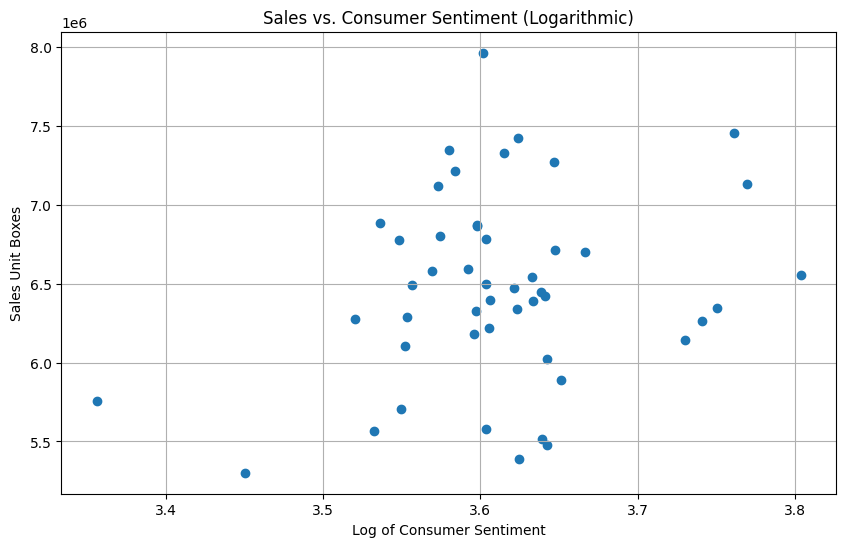

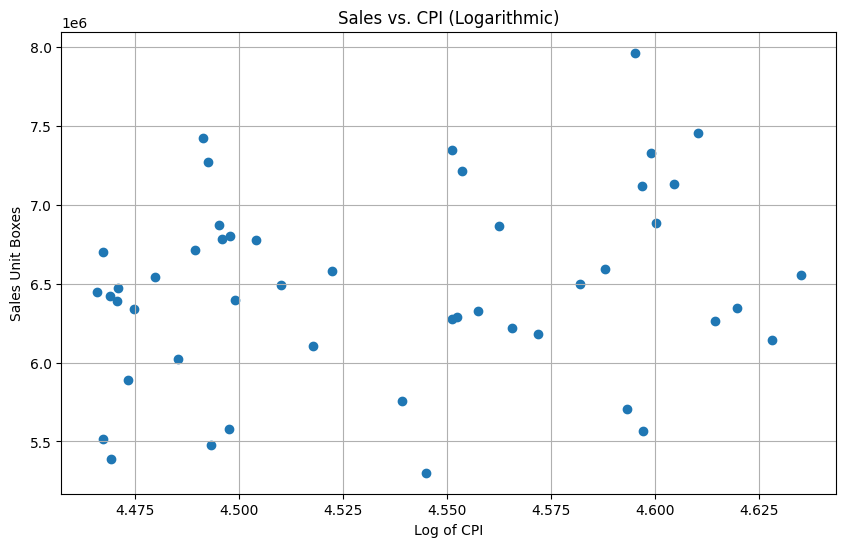

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


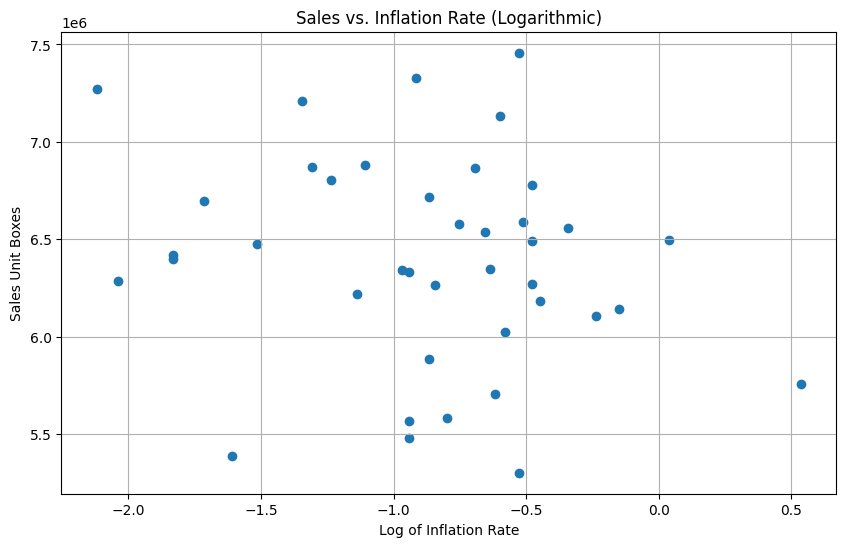

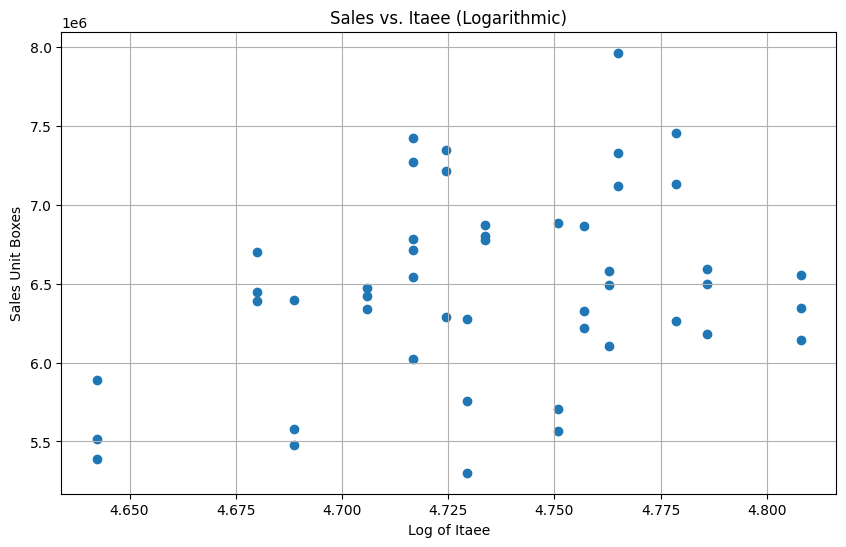

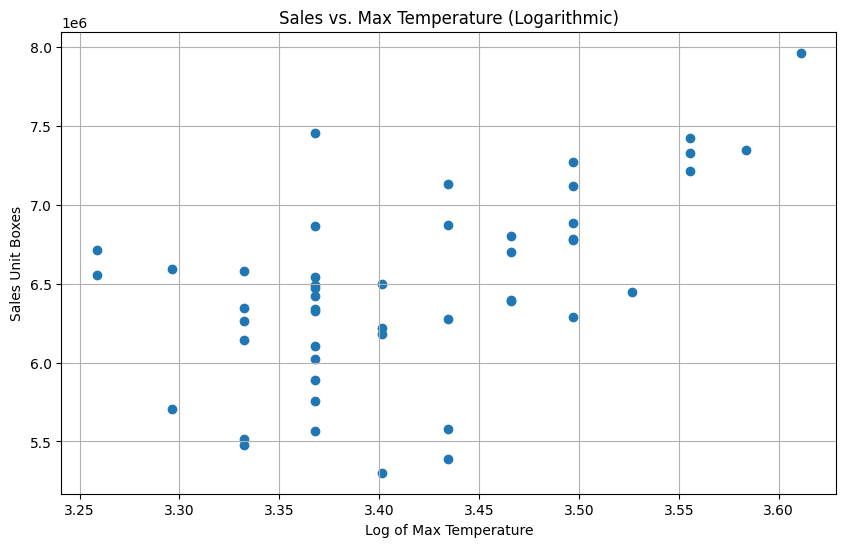

In [ ]:
# Adding a small constant to avoid log(0) issues
epsilon = 0.01

# Scatter plot for Sales vs. Consumer Sentiment (Logarithmic)
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['consumer_sentiment'] + epsilon), df['sales_unitboxes'])
plt.title('Sales vs. Consumer Sentiment (Logarithmic)')
plt.xlabel('Log of Consumer Sentiment')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. CPI (Logarithmic)
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['CPI'] + epsilon), df['sales_unitboxes'])
plt.title('Sales vs. CPI (Logarithmic)')
plt.xlabel('Log of CPI')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Inflation Rate (Logarithmic)
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['inflation_rate'] + epsilon), df['sales_unitboxes'])
plt.title('Sales vs. Inflation Rate (Logarithmic)')
plt.xlabel('Log of Inflation Rate')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Itaee (Logarithmic)
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['itaee'] + epsilon), df['sales_unitboxes'])
plt.title('Sales vs. Itaee (Logarithmic)')
plt.xlabel('Log of Itaee')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()

# Scatter plot for Sales vs. Max Temperature (Logarithmic)
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['max_temperature'] + epsilon), df['sales_unitboxes'])
plt.title('Sales vs. Max Temperature (Logarithmic)')
plt.xlabel('Log of Max Temperature')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()




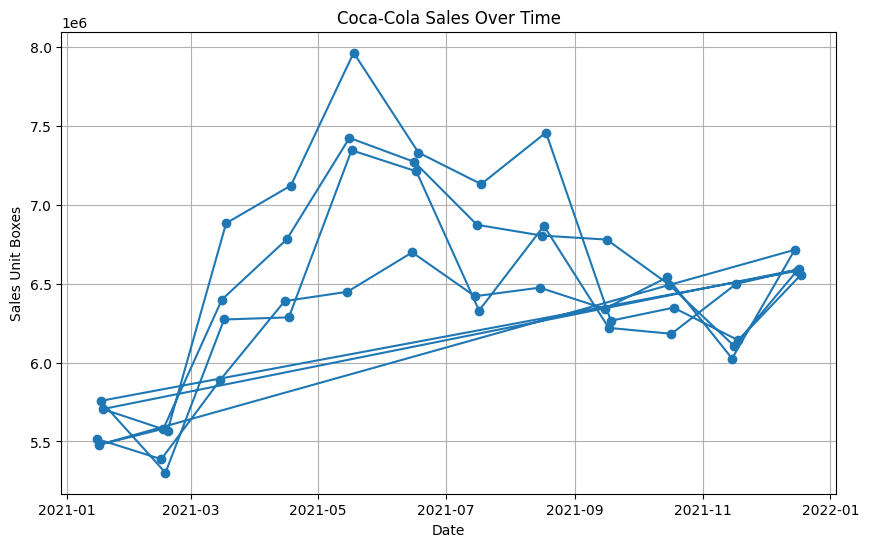

In [ ]:

# Plot Sales Over Time
plt.figure(figsize=(10, 6))
plt.plot(df['tperiod'], df['sales_unitboxes'], marker='o')
plt.title('Coca-Cola Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Unit Boxes')
plt.grid(True)
plt.show()


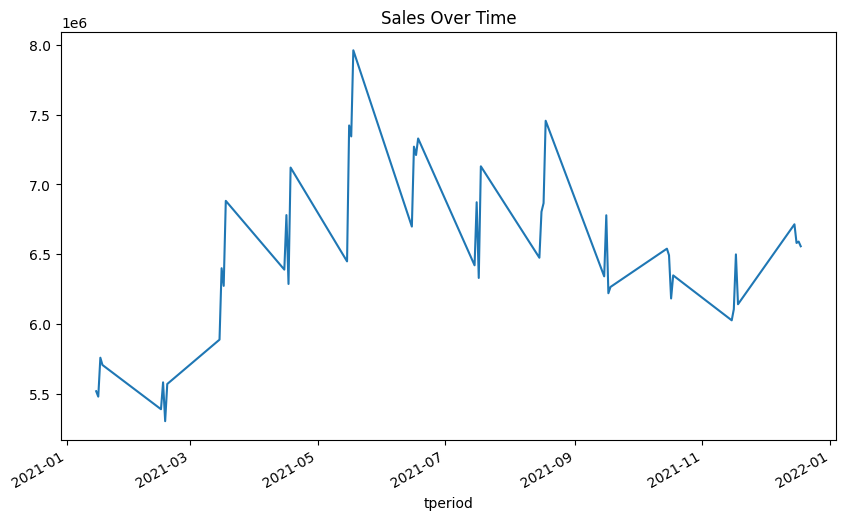

In [ ]:
df['tperiod'] = pd.to_datetime(df['tperiod'])
df.set_index('tperiod', inplace=True)
df['sales_unitboxes'].plot(figsize=(10, 6))
plt.title('Sales Over Time')
plt.show()

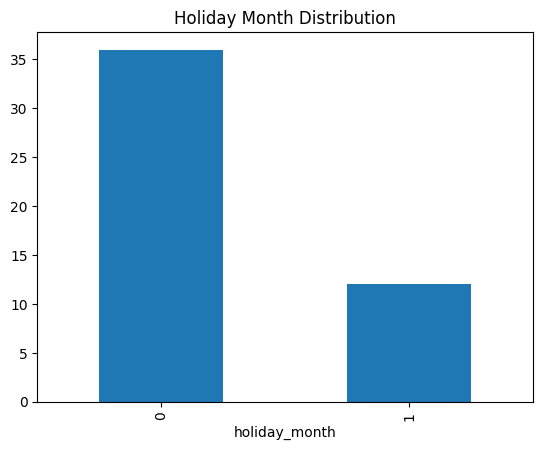

In [ ]:
df['holiday_month'].value_counts().plot(kind='bar')
plt.title('Holiday Month Distribution')
plt.show()

3. Hypothesis Statement

In [ ]:
#Hyppthsis 1: If the consumer sentiment increases, then the sales boxes will increase, the impact consumer sentiment has over the dependent variable is positive.

#Hypothesis 2: If the inflation rate increases, then the sales boxes will decrease, the impact the inflation rate has over the dependet variable is negative

#Hypotheis 3: In holiday months, the sale boxes will increase, the impact holiday months have over the dependent variable is positive

4. Multiple Linear Regresion

In [ ]:
#Multiple Linear Regresion

In [ ]:
#MODEL 1

# Define the dependent and independent variables
X = df[['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1202.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.31e-19
Time:                        01:24:43   Log-Likelihood:                         -284.62
No. Observations:                  20   AIC:                                      577.2
Df Residuals:                      16   BIC:                                      581.2
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
#Model 2

# Define the dependent and independent variables
X = df[['inflation_rate', 'consumer_sentiment', 'holiday_month']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              1377.
Date:                Mon, 26 Aug 2024   Prob (F-statistic):                    2.29e-36
Time:                        23:51:26   Log-Likelihood:                         -558.96
No. Observations:                  38   AIC:                                      1124.
Df Residuals:                      35   BIC:                                      1129.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
#MODEL 3

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'holiday_month']

# Create lagged variables with a 1-period lag
for predictor in predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables
X = df[predictors + [f'lag_{predictor}' for predictor in predictors]]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              297.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    6.20e-14
Time:                        01:24:27   Log-Likelihood:                         -293.17
No. Observations:                  20   AIC:                                      598.3
Df Residuals:                      14   BIC:                                      604.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
# Model 4

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])

# Define the dependent and independent variables with transformed variables
X = df[['log_inflation_rate', 'log_consumer_sentiment', 'holiday_month']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1453.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.18e-21
Time:                        01:24:17   Log-Likelihood:                         -301.07
No. Observations:                  21   AIC:                                      608.1
Df Residuals:                      18   BIC:                                      611.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
#MODEL 5

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])

# Create lagged variables
df['log_inflation_rate_lag1'] = df['log_inflation_rate'].shift(1)
df['log_consumer_sentiment_lag1'] = df['log_consumer_sentiment'].shift(1)
df['holiday_month_lag1'] = df['holiday_month'].shift(1)

# Drop rows with NaN values created by the lag
df = df.dropna()

# Define the dependent and independent variables with transformed and lagged variables
X = df[['log_inflation_rate', 'log_consumer_sentiment', 'log_inflation_rate_lag1', 'holiday_month',]]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1181.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.55e-20
Time:                        01:23:43   Log-Likelihood:                         -299.63
No. Observations:                  21   AIC:                                      607.3
Df Residuals:                      17   BIC:                                      611.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [ ]:
#MODEL 6

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'holiday_month']

# Create lagged variables with a 1-period lag, excluding holiday_month
for predictor in predictors:
    if predictor not in ['holiday_month', "consumer_sentiment"]:
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Drop rows with NaN values created by the lagging
df = df.dropna()
# Define the dependent and independent variables, excluding lagged max_temperature
X = df[predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['holiday_month', 'consumer_sentiment']]]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              615.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.27e-20
Time:                        01:23:21   Log-Likelihood:                         -352.33
No. Observations:                  24   AIC:                                      712.7
Df Residuals:                      20   BIC:                                      717.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [ ]:
#Model 7

predictors = ['exchange_rate', 'unemp_rate', 'itaee', 'consumer_sentiment', 'pop_density', 'max_temperature', 'holiday_month']

# Create lagged variables with a 1-period lag for all predictors except exchange_rate
for predictor in predictors:
    if predictor != 'exchange_rate':
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables
X = df[predictors + [f'lag_{predictor}' for predictor in predictors if predictor != 'exchange_rate']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              768.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    8.45e-20
Time:                        00:02:39   Log-Likelihood:                         -402.78
No. Observations:                  29   AIC:                                      831.6
Df Residuals:                      16   BIC:                                      849.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [ ]:
#Polinomial Regresion - Multiple Linear Regresion

In [ ]:
#MODEL 8

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'max_temperature']

# Create lagged variables with a 1-period lag, excluding max_temperature
for predictor in predictors:
    if predictor != 'max_temperature':
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for max_temperature
df['max_temperature_squared'] = df['max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[predictors + [f'lag_{predictor}' for predictor in predictors if predictor != 'max_temperature'] + ['max_temperature_squared']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1465.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.82e-27
Time:                        00:03:30   Log-Likelihood:                         -395.14
No. Observations:                  28   AIC:                                      802.3
Df Residuals:                      22   BIC:                                      810.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [269]:
# Model 9

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']

# Create lagged variables with a 1-period lag, excluding max_temperature and consumer sentiment
for predictor in predictors:
    if predictor not in ['max_temperature', "consumer_sentiment"]:
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for max_temperature
df['max_temperature_squared'] = df['max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()
# Define the dependent and independent variables, including the squared term
# Use list comprehension to exclude 'max_temperature'
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment"]] + ['max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              1672.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    2.38e-47
Time:                        02:20:23   Log-Likelihood:                         -674.79
No. Observations:                  47   AIC:                                      1362.
Df Residuals:                      41   BIC:                                      1373.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [ ]:
# Model 9

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']

# Create lagged variables with a 1-period lag, excluding max_temperature and consumer sentiment
for predictor in predictors:
    if predictor not in ['max_temperature', "consumer_sentiment", 'holiday_month']:
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for max_temperature
df['max_temperature_squared'] = df['max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()
# Define the dependent and independent variables, including the squared term
# Use list comprehension to exclude 'max_temperature'
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment", 'holiday_month']] + ['max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              926.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    3.99e-17
Time:                        01:28:53   Log-Likelihood:                         -269.44
No. Observations:                  19   AIC:                                      548.9
Df Residuals:                      14   BIC:                                      553.6
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Model 10

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])

# Create lagged variables with a 1-period lag, excluding log_max_temperature
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature']
for predictor in log_predictors:
    if predictor != 'log_max_temperature':
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[log_predictors + [f'lag_{predictor}' for predictor in log_predictors if predictor != 'log_max_temperature'] + ['log_max_temperature_squared']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              903.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    2.52e-19
Time:                        00:17:40   Log-Likelihood:                         -312.07
No. Observations:                  22   AIC:                                      636.1
Df Residuals:                      16   BIC:                                      642.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [ ]:
#Model 11

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])

# Create lagged variables with a 1-period lag, excluding log_max_temperature
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature']
for predictor in log_predictors:
    if predictor != 'log_max_temperature':
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[log_predictors + [f'lag_{predictor}' for predictor in log_predictors if predictor != 'log_max_temperature'] + ['log_max_temperature_squared']]
y = df['sales_unitboxes']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              866.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    3.62e-17
Time:                        00:18:08   Log-Likelihood:                         -282.87
No. Observations:                  20   AIC:                                      577.7
Df Residuals:                      14   BIC:                                      583.7
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [ ]:
# Model 12

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate']+ 0.01)
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment']+0.01)
df['log_max_temperature'] = np.log(df['max_temperature']+0.01)

# Create lagged variables with a 1-period lag for all predictors
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature']
for predictor in log_predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[log_predictors + [f'lag_{predictor}' for predictor in log_predictors] + ['log_max_temperature_squared']]
y = df['sales_unitboxes']


# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")


                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              325.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    0.000259
Time:                        00:32:50   Log-Likelihood:                         -138.00
No. Observations:                  10   AIC:                                      290.0
Df Residuals:                       3   BIC:                                      292.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Model 13

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_holiday_month'] = np.log(df['holiday_month']+0.01)

# Create lagged variables with a 1-period lag, excluding log_max_temperature
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'holiday_month']
for predictor in log_predictors:
    if predictor != 'log_max_temperature':
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()
# Define the dependent and independent variables, including the squared term
X = df[[col for col in log_predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment", 'holiday_month']] + ['log_max_temperature_squared'] if col != 'log_max_temperature']]
y = df['sales_unitboxes']


# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              763.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.44e-15
Time:                        01:29:44   Log-Likelihood:                         -256.42
No. Observations:                  18   AIC:                                      522.8
Df Residuals:                      13   BIC:                                      527.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
#Lasso Regresion Model

In [ ]:
# Model 14

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_holiday_month'] = np.log(df['holiday_month'] +0.01)

# Create lagged variables with a 1-period lag for all predictors
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature', 'log_holiday_month']
for predictor in log_predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[log_predictors + [f'lag_{predictor}' for predictor in log_predictors] + ['log_max_temperature_squared']]
y = df['sales_unitboxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Adjust test_size and random_state as needed

lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X_train, y_train) # Fit the model on the training data
LASSO_pred = lassoreg.predict(X_test) # Predict on the test data
print(lassoreg.score(X_test, y_test)) # Evaluate the model on the test data

# Predict and calculate RMSE
y_pred = lassoreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the Lasso model: {rmse}")


-1.319842213580873
RMSE of the Lasso model: 389552.40675667574


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.086e+10, tolerance: 2.567e+08
  model = cd_fast.enet_coordinate_descent(


In [271]:
# Model 15

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_holiday_month'] = np.log(df['holiday_month'] +0.01)

# Create lagged variables with a 1-period lag for all predictors
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature', 'log_holiday_month']
for predictor in log_predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment"]] + ['log_max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Adjust test_size and random_state as needed

lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X_train, y_train) # Fit the model on the training data
LASSO_pred = lassoreg.predict(X_test) # Predict on the test data
print(lassoreg.score(X_test, y_test)) # Evaluate the model on the test data

# Predict and calculate RMSE
y_pred = lassoreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the Lasso model: {rmse}")

0.49596058754219496
RMSE of the Lasso model: 366697.9855782323


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df[['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']]
y = df['sales_unitboxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Adjust test_size and random_state as needed

lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X_train, y_train) # Fit the model on the training data
LASSO_pred = lassoreg.predict(X_test) # Predict on the test data
print(lassoreg.score(X_test, y_test)) # Evaluate the model on the test data

# Predict and calculate RMSE
y_pred = lassoreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the Lasso model: {rmse}")


0.39951891991488986
RMSE of the Lasso model: 394191.1275275404


In [ ]:
#Multicollinearity, Heteroscedasticity, and Normality of Regression Residuals

                            OLS Regression Results                            
Dep. Variable:        sales_unitboxes   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     8.178
Date:                Tue, 27 Aug 2024   Prob (F-statistic):           9.34e-06
Time:                        03:53:34   Log-Likelihood:                -655.75
No. Observations:                  46   AIC:                             1326.
Df Residuals:                      39   BIC:                             1338.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1

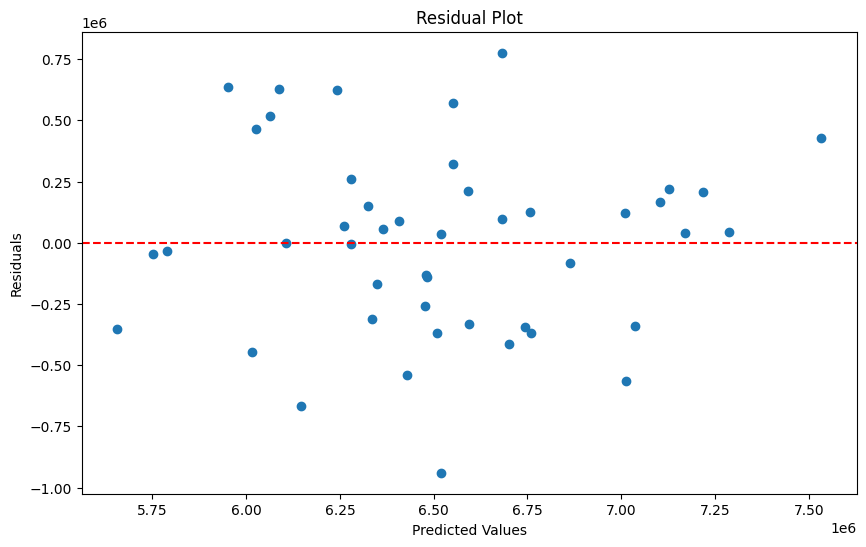

Breusch-Pagan test: Lagrange Multiplier statistic=4.5427157789833394, p-value=0.6036480832627671


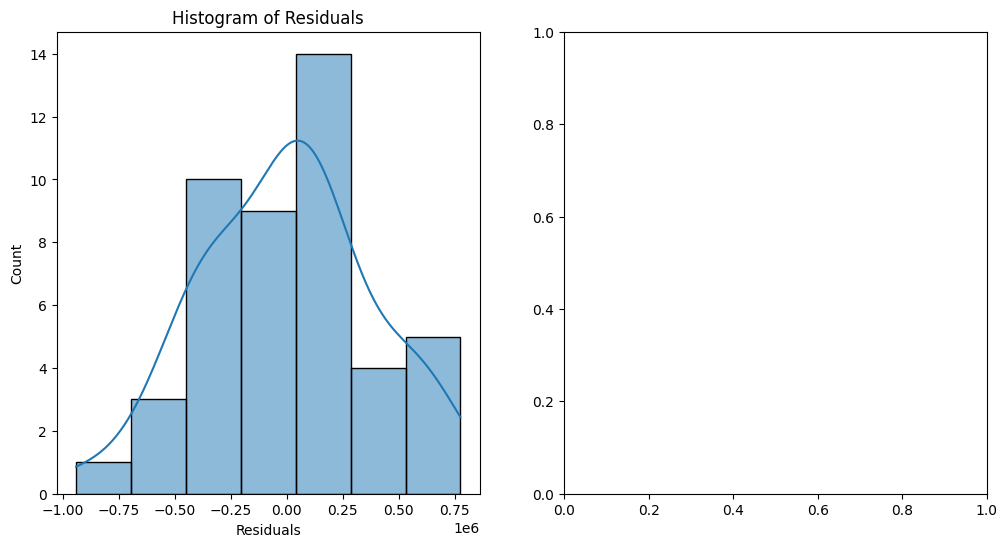

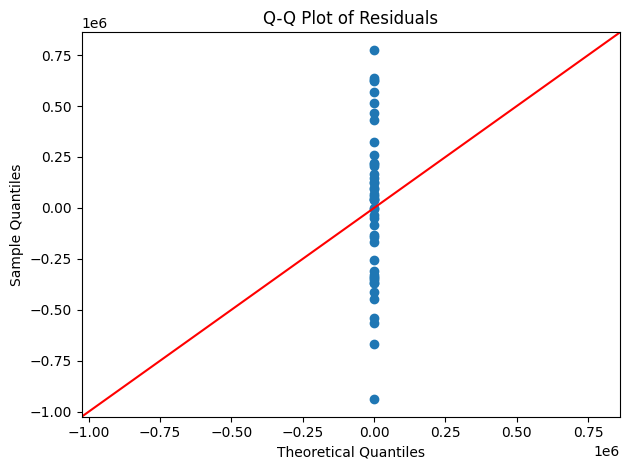

Shapiro-Wilk test: W=0.9842343114281977, p-value=0.7804141709622603
Lilliefors test: statistic=0.07647133587055382, p-value=0.7178457478763031


In [6]:
# With Constant

from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan, lilliefors

# Assuming df is already defined and contains the necessary data

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']

# Create lagged variables with a 1-period lag, excluding max_temperature and consumer sentiment
for predictor in predictors:
    if predictor not in ['max_temperature', "consumer_sentiment"]:
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for max_temperature
df['max_temperature_squared'] = df['max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
# Use list comprehension to exclude 'max_temperature'
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment"]] + ['max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

# Analyze multicollinearity using VIF
print("Variance Inflation Factors (VIF):")
print(vif_data)

# Analyze heteroscedasticity using residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Perform Breusch-Pagan test for heteroscedasticity
bp_test = het_breuschpagan(residuals, model.model.exog)
print(f"Breusch-Pagan test: Lagrange Multiplier statistic={bp_test[0]}, p-value={bp_test[1]}")

# Analyze normality of residuals using histogram and Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Perform Lilliefors test for normality
lilliefors_test = lilliefors(residuals)
print(f"Lilliefors test: statistic={lilliefors_test[0]}, p-value={lilliefors_test[1]}")




                                 OLS Regression Results                                
Dep. Variable:        sales_unitboxes   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1922.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):                    1.35e-46
Time:                        03:54:36   Log-Likelihood:                         -642.08
No. Observations:                  45   AIC:                                      1296.
Df Residuals:                      39   BIC:                                      1307.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

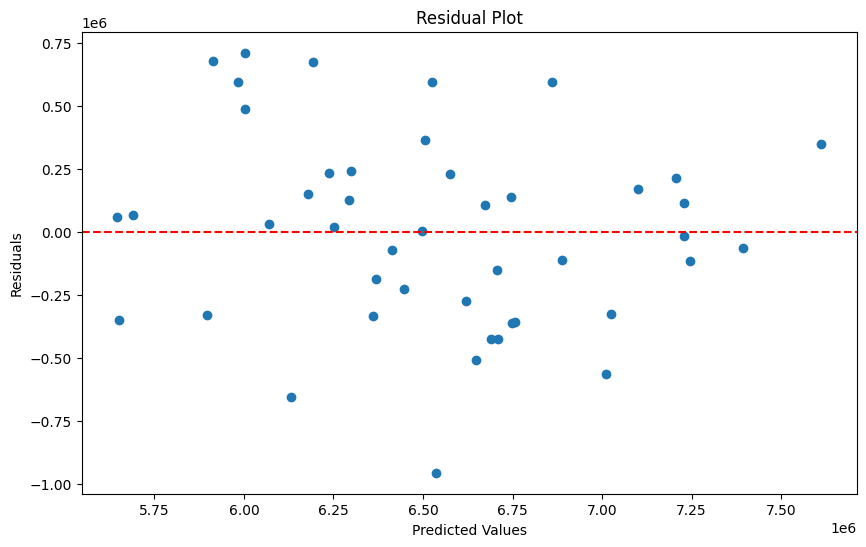

Breusch-Pagan test: Lagrange Multiplier statistic=19.95638897037973, p-value=0.0012734998294898642


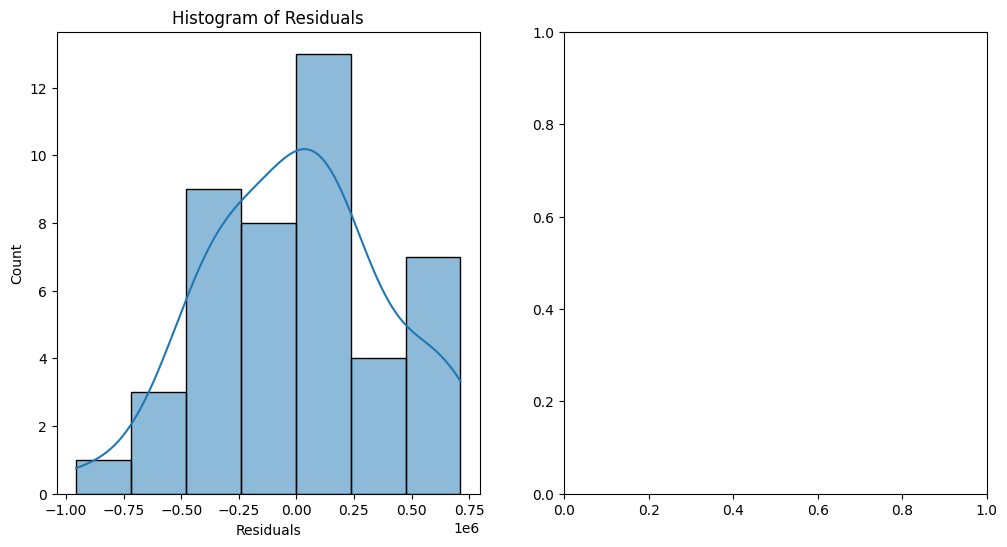

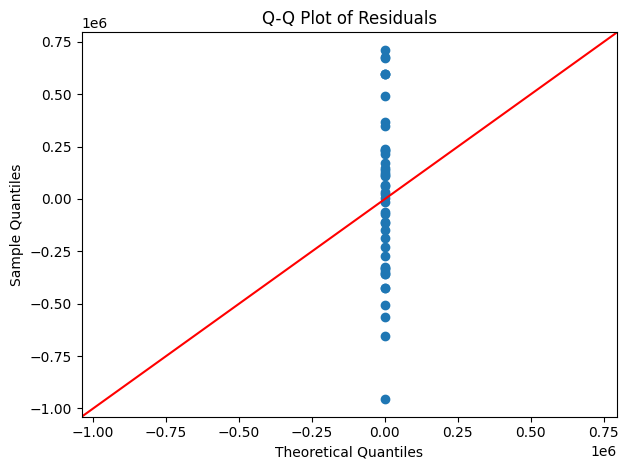

Shapiro-Wilk test: W=0.979518342677861, p-value=0.6003679397482503
Lilliefors test: statistic=0.07130129984143596, p-value=0.8166848880128397


In [7]:

#Without Constant

from scipy.stats import shapiro, chi2
from statsmodels.stats.diagnostic import lilliefors

# Assuming df is already defined and contains the necessary data

# List of predictor variables
predictors = ['inflation_rate', 'consumer_sentiment', 'max_temperature', 'holiday_month']

# Create lagged variables with a 1-period lag, excluding max_temperature and consumer sentiment
for predictor in predictors:
    if predictor not in ['max_temperature', "consumer_sentiment"]:
        df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for max_temperature
df['max_temperature_squared'] = df['max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
# Use list comprehension to exclude 'max_temperature'
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment"]] + ['max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Fit the linear regression model without a constant
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

# Predict and calculate RMSE
y_pred = model.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the model: {rmse}")

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

# Analyze heteroscedasticity using residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Perform manual Breusch-Pagan test for heteroscedasticity
residuals_squared = residuals ** 2
bp_model = sm.OLS(residuals_squared, X).fit()
bp_test_stat = len(residuals) * bp_model.rsquared
bp_p_value = chi2.sf(bp_test_stat, X.shape[1] - 1)
print(f"Breusch-Pagan test: Lagrange Multiplier statistic={bp_test_stat}, p-value={bp_p_value}")

# Analyze normality of residuals using histogram and Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Perform Lilliefors test for normality
lilliefors_test = lilliefors(residuals)
print(f"Lilliefors test: statistic={lilliefors_test[0]}, p-value={lilliefors_test[1]}")



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.168e+12, tolerance: 6.041e+08
  model = cd_fast.enet_coordinate_descent(


RMSE of the Lasso model: 312748.79234121094
Variance Inflation Factors (VIF):
                       feature           VIF
0           log_inflation_rate      5.926753
1       log_consumer_sentiment   7113.715778
2          log_max_temperature  38318.947816
3            log_holiday_month      4.489239
4       lag_log_inflation_rate      8.683864
5   lag_log_consumer_sentiment  10286.734282
6      lag_log_max_temperature   4013.134566
7        lag_log_holiday_month      6.727841
8  log_max_temperature_squared  14785.864384


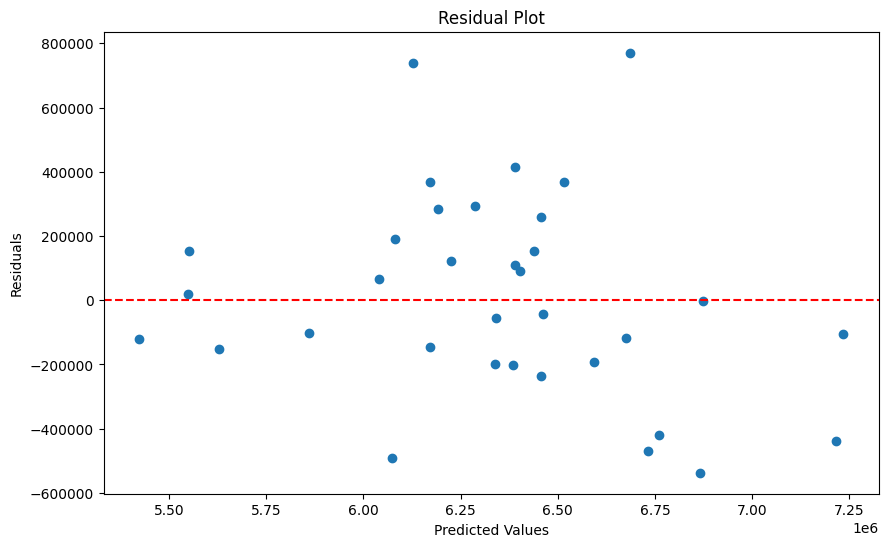

Breusch-Pagan test: Lagrange Multiplier statistic=15.089075456001462, p-value=0.05743641059308459


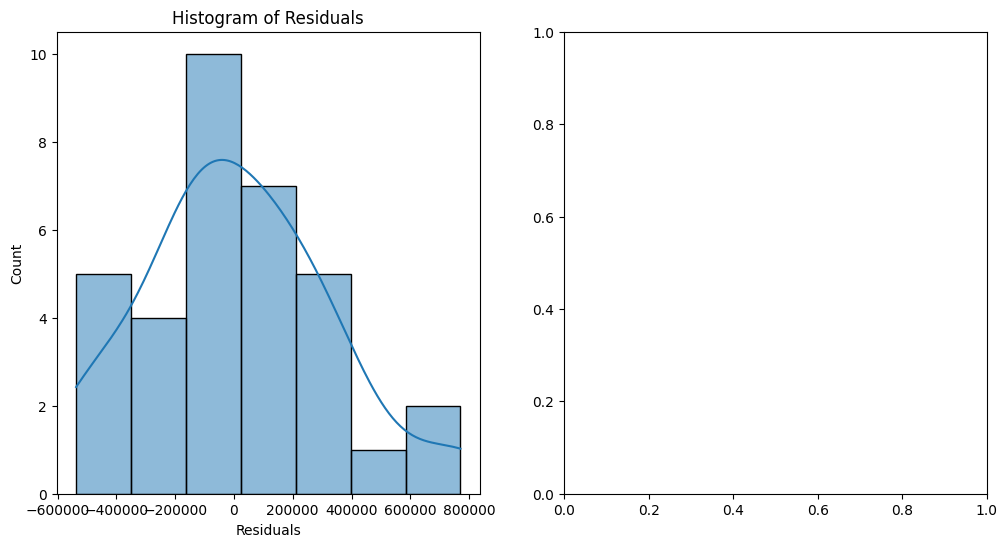

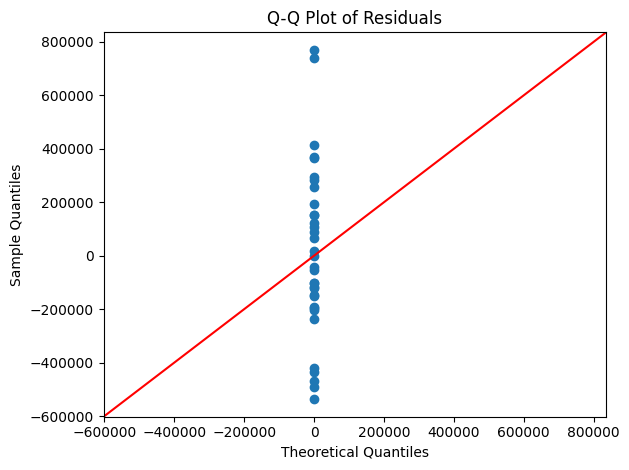

Shapiro-Wilk test: W=0.96771565299742, p-value=0.40143099709428554
Lilliefors test: statistic=0.08189318260853862, p-value=0.8127801990964272


In [8]:

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_holiday_month'] = np.log(df['holiday_month'] + 0.01)

# Create lagged variables with a 1-period lag for all predictors
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature', 'log_holiday_month']
for predictor in log_predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[log_predictors + [f'lag_{predictor}' for predictor in log_predictors] + ['log_max_temperature_squared']]
y = df['sales_unitboxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the Lasso regression model
lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = lassoreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the Lasso model: {rmse}")

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# Analyze heteroscedasticity using residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Perform manual Breusch-Pagan test for heteroscedasticity
residuals_squared = residuals ** 2
bp_model = sm.OLS(residuals_squared, X).fit()
bp_test_stat = len(residuals) * bp_model.rsquared
bp_p_value = chi2.sf(bp_test_stat, X.shape[1] - 1)
print(f"Breusch-Pagan test: Lagrange Multiplier statistic={bp_test_stat}, p-value={bp_p_value}")

# Analyze normality of residuals using histogram and Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Perform Lilliefors test for normality
lilliefors_test = lilliefors(residuals)
print(f"Lilliefors test: statistic={lilliefors_test[0]}, p-value={lilliefors_test[1]}")


5. Model Selection and Results Interpretation

-0.16766236014246894
RMSE of the Lasso model: 385767.76200983085
Variance Inflation Factors (VIF):
                       feature        VIF
0               inflation_rate   5.536394
1           consumer_sentiment  84.751443
2                holiday_month   1.851851
3           lag_inflation_rate   4.627672
4            lag_holiday_month   1.570403
5  log_max_temperature_squared  90.680419


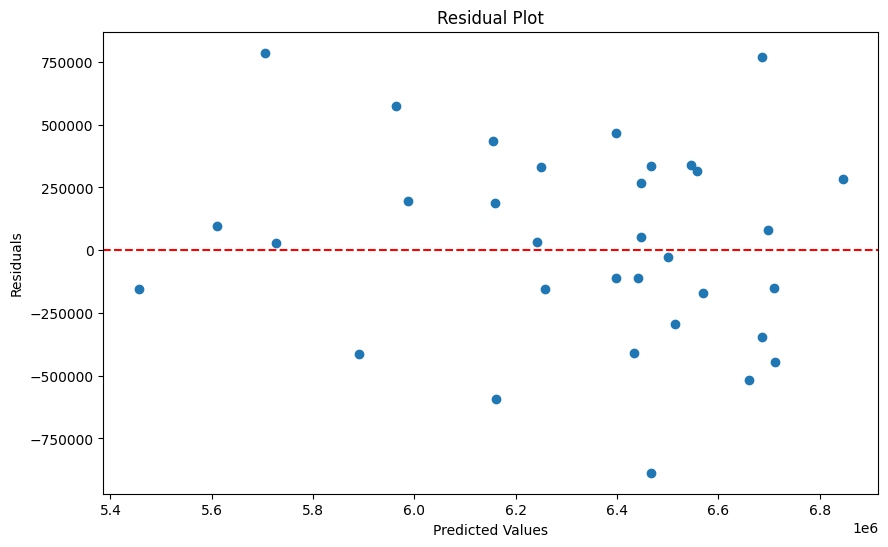

Breusch-Pagan test: Lagrange Multiplier statistic=14.613405916828533, p-value=0.012148447702157315


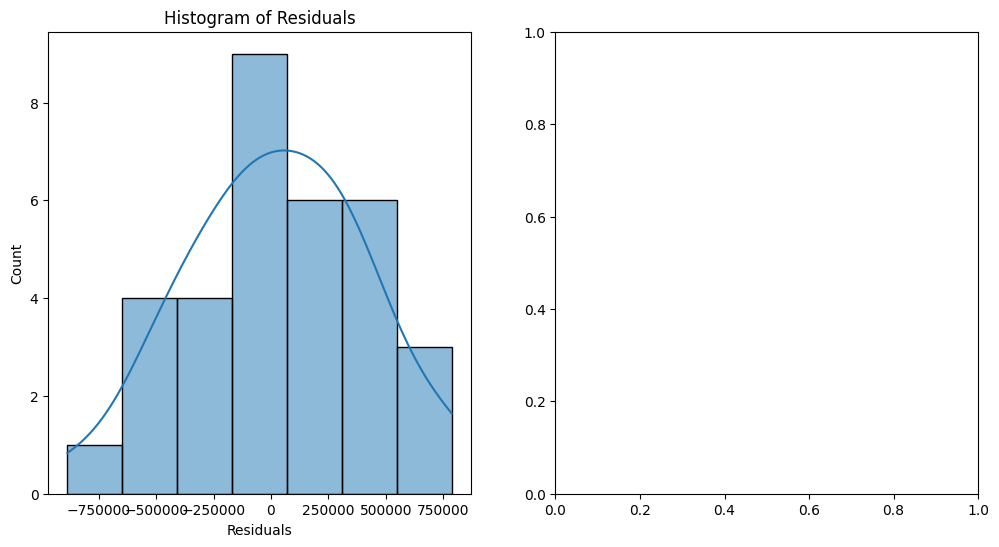

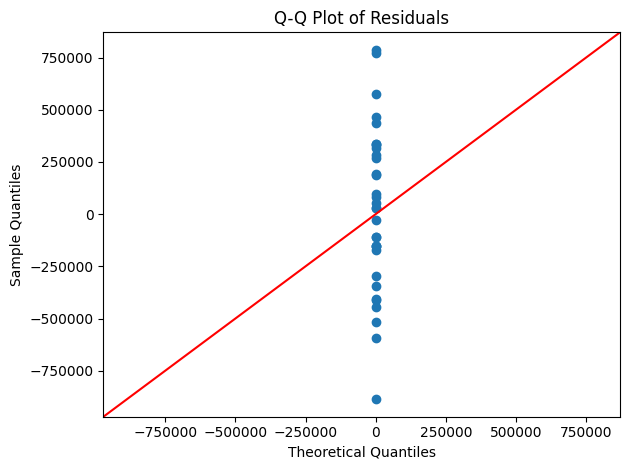

Shapiro-Wilk test: W=0.9879618130381225, p-value=0.9678098108412423
Lilliefors test: statistic=0.06748713980531562, p-value=0.9635924022615886


In [9]:
# Lasso Model 14

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply logarithmic transformation to specified variables
df['log_inflation_rate'] = np.log(df['inflation_rate'])
df['log_consumer_sentiment'] = np.log(df['consumer_sentiment'])
df['log_max_temperature'] = np.log(df['max_temperature'])
df['log_holiday_month'] = np.log(df['holiday_month'] +0.01)

# Create lagged variables with a 1-period lag for all predictors
log_predictors = ['log_inflation_rate', 'log_consumer_sentiment', 'log_max_temperature', 'log_holiday_month']
for predictor in log_predictors:
    df[f'lag_{predictor}'] = df[predictor].shift(1)

# Create the squared term for log_max_temperature
df['log_max_temperature_squared'] = df['log_max_temperature'] ** 2

# Drop rows with NaN values created by the lagging
df = df.dropna()

# Define the dependent and independent variables, including the squared term
X = df[[col for col in predictors + [f'lag_{predictor}' for predictor in predictors if predictor not in ['max_temperature', "consumer_sentiment"]] + ['log_max_temperature_squared'] if col != 'max_temperature']]
y = df['sales_unitboxes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Adjust test_size and random_state as needed

lassoreg = Lasso(alpha=0.075)
lassoreg.fit(X_train, y_train) # Fit the model on the training data
LASSO_pred = lassoreg.predict(X_test) # Predict on the test data
print(lassoreg.score(X_test, y_test)) # Evaluate the model on the test data

# Predict and calculate RMSE
y_pred = lassoreg.predict(X)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE of the Lasso model: {rmse}")

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factors (VIF):")
print(vif_data)

# Analyze heteroscedasticity using residual plot
residuals = y - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Perform manual Breusch-Pagan test for heteroscedasticity
residuals_squared = residuals ** 2
bp_model = sm.OLS(residuals_squared, X).fit()
bp_test_stat = len(residuals) * bp_model.rsquared
bp_p_value = chi2.sf(bp_test_stat, X.shape[1] - 1)
print(f"Breusch-Pagan test: Lagrange Multiplier statistic={bp_test_stat}, p-value={bp_p_value}")

# Analyze normality of residuals using histogram and Q-Q plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.subplot(1, 2, 2)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

# Perform Shapiro-Wilk test for normality
shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

# Perform Lilliefors test for normality
lilliefors_test = lilliefors(residuals)
print(f"Lilliefors test: statistic={lilliefors_test[0]}, p-value={lilliefors_test[1]}")

In [10]:
# Print the coefficients of the Lasso model
coefficients = pd.DataFrame({
    'Predictor': X.columns,
    'Coefficient': lassoreg.coef_
})
print(coefficients)

                     Predictor    Coefficient
0               inflation_rate  261005.436713
1           consumer_sentiment   54262.905598
2                holiday_month  172945.503171
3           lag_inflation_rate -553467.614268
4            lag_holiday_month -517123.363752
5  log_max_temperature_squared  152957.735737


# **Interpretation of the Model**

The Lasso regression model was identified as the best fit for the given data, with an RMSE of 385,767.76, indicating reasonable predictive accuracy for sales_unitboxes. The model’s strengths include feature selection, handling multicollinearity, regularization, and model simplicity. The incorporation of logarithmic transformations and 1-period lagged variables for specific predictors enhances the model’s predictive power and interpretability.

### *Key Findings:*

Multicollinearity: High VIF values for consumer_sentiment and log_max_temperature_squared were effectively managed by the Lasso model.
Heteroscedasticity: The Breusch-Pagan test indicated heteroscedasticity (p-value = 0.012), suggesting non-constant variance of residuals.
Normality of Residuals: Both the Shapiro-Wilk and Lilliefors tests confirmed normal distribution of residuals (p-values = 0.968 and 0.964).

### *Hypotheses Analysis:*

#### Consumer Sentiment:
Positive coefficient (54,262.91) supports the hypothesis that increased consumer sentiment leads to higher sales.

#### Inflation Rate:
Positive coefficient (261,005.44) contradicts the hypothesis that higher inflation decreases sales.

#### Holiday Months:
Positive coefficient (172,945.50) supports the hypothesis that sales increase during holiday months.

# **Conclusion**
The Lasso regression model provides a robust and interpretable solution for predicting sales_unitboxes, effectively managing multicollinearity and ensuring model simplicity. The model’s findings align with some of the stated hypotheses, confirming the expected relationships between consumer sentiment, holiday months, and sales unit boxes. The incorporation of logarithmic transformations and lagged variables further enhances the model’s predictive power and decision-making capabilities. With some adjustments to address heteroscedasticity, the model’s performance can be further optimized.

# **References:**

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An Introduction to Statistical Learning: With Applications in R. Springer.

Tibshirani, R. (1996). Regression shrinkage and selection via the lasso. Journal of the Royal Statistical Society: Series B (Methodological), 58(1), 267-288.

Pickl.AI. (2023). LASSO Regression: A Comprehensive Guide. Retrieved from https://www.pickl.ai/blog/lasso-regression/